**Install the required libraries:**

In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
model = YOLO('yolov8n-seg.pt')  # build a new model from YAML or use a pretrained model
  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.74M/6.74M [00:00<00:00, 146MB/s]


In [ ]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/yolov8_segmentation/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

**Train the model**

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results"
#Define subdirectory for this specific training
name = "50_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [ ]:
# Train the model
results = model.train(data='/content/drive/MyDrive/yolov8_segmentation/data.yaml',
                      project=project,
                      name=name,
                      epochs=50,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=400)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolov8_segmentation/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=400, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=50_epochs-4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0, pl

100%|██████████| 755k/755k [00:00<00:00, 28.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1   1004275  ultralytics.nn.modules.head.Segment          [1, 32, 64, [64, 128, 256]]   
YOLOv8n-seg summary: 151 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[400] must be multiple of max stride 32, updating to [416]
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.0±0.0 MB/s, size: 12.8 KB)


train: Scanning /content/drive/MyDrive/yolov8_segmentation/train/labels... 799 images, 53 backgrounds, 0 corrupt: 100%|██████████| 852/852 [05:03<00:00,  2.81it/s]


train: New cache created: /content/drive/MyDrive/yolov8_segmentation/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.0±0.0 MB/s, size: 13.8 KB)


val: Scanning /content/drive/MyDrive/yolov8_segmentation/valid/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [01:02<00:00,  1.12it/s]

val: New cache created: /content/drive/MyDrive/yolov8_segmentation/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results/50_epochs-4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results/50_epochs-4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.391G      1.569      2.117      2.238      1.378          9        416: 100%|██████████| 213/213 [00:30<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.55it/s]


                   all         70        103      0.185      0.524      0.154     0.0698      0.175      0.513      0.138     0.0558

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.492G      1.747      1.998      1.988      1.485          8        416: 100%|██████████| 213/213 [00:27<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.04it/s]

                   all         70        103      0.234      0.495      0.184     0.0744      0.239      0.466      0.189     0.0714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.512G      1.807      1.941      1.876      1.533          8        416: 100%|██████████| 213/213 [00:27<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.25it/s]

                   all         70        103      0.276       0.67      0.283      0.123      0.309      0.709      0.345       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.529G      1.771      1.954      1.842      1.521          7        416: 100%|██████████| 213/213 [00:27<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.80it/s]

                   all         70        103      0.222      0.592      0.191      0.082      0.213      0.573        0.2     0.0788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.547G      1.772      1.842      1.747      1.489         12        416: 100%|██████████| 213/213 [00:27<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.10it/s]

                   all         70        103      0.516      0.505      0.436      0.196       0.53      0.466      0.424      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.566G      1.654      1.705       1.61      1.433         18        416: 100%|██████████| 213/213 [00:27<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.17it/s]

                   all         70        103       0.45      0.408       0.38        0.2      0.364      0.515      0.365      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.584G      1.629      1.757      1.591      1.404          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.14it/s]

                   all         70        103      0.332      0.427       0.34      0.141      0.305      0.398      0.264     0.0885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.604G      1.627      1.776      1.557      1.412          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.02it/s]

                   all         70        103      0.462      0.563      0.463      0.214      0.483      0.573      0.454       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.621G      1.588      1.676       1.56      1.372         10        416: 100%|██████████| 213/213 [00:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.32it/s]

                   all         70        103      0.658      0.515      0.621       0.32      0.685      0.534      0.609      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.641G      1.527      1.611      1.499      1.351         19        416: 100%|██████████| 213/213 [00:27<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.63it/s]


                   all         70        103      0.598      0.641      0.561      0.284      0.611       0.65      0.559      0.273

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      0.66G        1.5      1.756      1.478      1.326          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.18it/s]

                   all         70        103      0.313      0.363      0.311      0.161      0.328      0.417      0.351      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.678G      1.508      1.629      1.442      1.348          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.27it/s]

                   all         70        103      0.707       0.68      0.685      0.352      0.704      0.718      0.692      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.695G      1.478      1.676      1.396       1.32          6        416: 100%|██████████| 213/213 [00:28<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.33it/s]


                   all         70        103      0.691      0.718      0.737      0.423       0.71      0.666      0.718      0.386

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.713G      1.445      1.534      1.441       1.33         12        416: 100%|██████████| 213/213 [00:28<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.88it/s]

                   all         70        103      0.542      0.631      0.622      0.335      0.582      0.641      0.642      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.732G      1.469      1.625      1.402       1.31          7        416: 100%|██████████| 213/213 [00:27<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]

                   all         70        103      0.513      0.602      0.552      0.318      0.513      0.602       0.56      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.752G      1.467      1.656      1.345      1.305         12        416: 100%|██████████| 213/213 [00:28<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.26it/s]

                   all         70        103      0.581      0.699      0.633      0.356      0.569       0.68       0.57      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      0.77G      1.402      1.559      1.311      1.285          7        416: 100%|██████████| 213/213 [00:28<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.22it/s]

                   all         70        103      0.527      0.621      0.605      0.342      0.527      0.621      0.587      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.787G      1.397      1.571      1.336      1.292          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all         70        103      0.472      0.599      0.528      0.287      0.475      0.621      0.532      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.807G      1.405      1.531      1.319      1.278          3        416: 100%|██████████| 213/213 [00:27<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.09it/s]

                   all         70        103      0.597      0.592      0.665      0.397      0.591      0.583      0.627      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.824G      1.396      1.511        1.3      1.283         11        416: 100%|██████████| 213/213 [00:27<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.79it/s]

                   all         70        103      0.481      0.505      0.487      0.288      0.457      0.476      0.429      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.844G      1.346       1.53      1.314      1.263         11        416: 100%|██████████| 213/213 [00:27<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.54it/s]

                   all         70        103       0.66       0.67      0.713      0.432       0.73      0.544      0.655      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.863G      1.344      1.574      1.248      1.272          8        416: 100%|██████████| 213/213 [00:27<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]

                   all         70        103      0.587      0.689       0.61      0.378      0.597      0.699        0.6      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.881G      1.308      1.545      1.249      1.241          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.00it/s]

                   all         70        103      0.723      0.641      0.711      0.426      0.711      0.631      0.705      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50       0.9G      1.321      1.413      1.215      1.238          7        416: 100%|██████████| 213/213 [00:27<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.04it/s]

                   all         70        103      0.739      0.641      0.736      0.454      0.692       0.65      0.656      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.918G      1.293       1.45      1.239      1.241          8        416: 100%|██████████| 213/213 [00:28<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.19it/s]

                   all         70        103      0.606      0.573      0.586      0.368      0.595      0.556      0.535      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.936G      1.302      1.531      1.261      1.258          4        416: 100%|██████████| 213/213 [00:28<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.26it/s]

                   all         70        103      0.748      0.738      0.782      0.478      0.727      0.718      0.751      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.955G      1.316       1.46      1.194      1.258          5        416: 100%|██████████| 213/213 [00:28<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.84it/s]

                   all         70        103       0.58      0.777      0.666      0.391       0.61      0.757      0.622      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.973G      1.307      1.574       1.27      1.239         11        416: 100%|██████████| 213/213 [00:27<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.52it/s]

                   all         70        103      0.561      0.719      0.668      0.388      0.552      0.699      0.601      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.992G      1.288      1.446      1.169       1.23         17        416: 100%|██████████| 213/213 [00:28<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]

                   all         70        103       0.81      0.621      0.765      0.492      0.676      0.767       0.75       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.01G      1.224      1.401       1.12      1.213          6        416: 100%|██████████| 213/213 [00:29<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.05it/s]

                   all         70        103      0.729      0.728      0.791      0.471       0.74      0.738      0.788      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.03G      1.239      1.387      1.181      1.218          9        416: 100%|██████████| 213/213 [00:29<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.90it/s]

                   all         70        103      0.619      0.787      0.713      0.413      0.626      0.777      0.695      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.05G      1.282      1.449      1.207      1.238          8        416: 100%|██████████| 213/213 [00:28<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]

                   all         70        103      0.654       0.67      0.701      0.447      0.669      0.621      0.654      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.07G      1.231      1.489      1.123      1.208         16        416: 100%|██████████| 213/213 [00:28<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.71it/s]

                   all         70        103      0.652      0.796       0.77      0.473       0.64      0.777       0.72      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.08G      1.247      1.423      1.172      1.214          7        416: 100%|██████████| 213/213 [00:28<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.10it/s]

                   all         70        103      0.603       0.65      0.637        0.4        0.6       0.65      0.611      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.1G      1.198      1.401      1.124      1.196          7        416: 100%|██████████| 213/213 [00:28<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]

                   all         70        103      0.698      0.786      0.785      0.497        0.7      0.835       0.78      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.12G      1.163      1.375      1.104      1.177         11        416: 100%|██████████| 213/213 [00:27<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]

                   all         70        103       0.77       0.65      0.763      0.462       0.76      0.676      0.715      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.14G        1.2      1.431      1.139      1.208          7        416: 100%|██████████| 213/213 [00:27<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.92it/s]

                   all         70        103      0.686      0.764      0.775      0.469       0.67      0.767      0.746      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.16G      1.212      1.392      1.116      1.209          9        416: 100%|██████████| 213/213 [00:27<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.33it/s]

                   all         70        103       0.75      0.738      0.793      0.529      0.746       0.77      0.791      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.18G      1.187      1.374       1.08      1.185          6        416: 100%|██████████| 213/213 [00:28<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.34it/s]

                   all         70        103      0.819      0.689      0.781      0.503      0.724      0.825      0.773       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.2G      1.179       1.39      1.106      1.191          9        416: 100%|██████████| 213/213 [00:27<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.01it/s]

                   all         70        103       0.73      0.699      0.768      0.481      0.745       0.68      0.743      0.411


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.21G      1.215       1.21      1.167      1.248          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]

                   all         70        103      0.732      0.728      0.767      0.483      0.756      0.757      0.772      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.23G      1.176      1.228      1.123       1.23          4        416: 100%|██████████| 213/213 [00:27<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.05it/s]

                   all         70        103      0.755      0.796      0.814      0.523      0.856      0.757      0.806      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.25G      1.208      1.274      1.103      1.253          5        416: 100%|██████████| 213/213 [00:27<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.29it/s]

                   all         70        103      0.761      0.774      0.819      0.539      0.761      0.774      0.788      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.27G      1.139      1.196       1.09      1.208          4        416: 100%|██████████| 213/213 [00:27<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.42it/s]

                   all         70        103        0.8      0.779      0.823      0.525      0.796      0.786      0.791      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.29G      1.154      1.198      1.101       1.21          5        416: 100%|██████████| 213/213 [00:26<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]

                   all         70        103      0.801      0.782       0.82      0.535      0.796      0.798      0.802      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.3G      1.105      1.163      1.052      1.191          5        416: 100%|██████████| 213/213 [00:27<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.41it/s]


                   all         70        103      0.833      0.786      0.829      0.543      0.845      0.796      0.822      0.463

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.32G      1.094      1.161      1.045      1.192          8        416: 100%|██████████| 213/213 [00:28<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.02it/s]

                   all         70        103      0.835      0.757      0.818      0.548      0.853      0.757       0.82      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.34G      1.125      1.194      1.092      1.212          6        416: 100%|██████████| 213/213 [00:27<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.32it/s]


                   all         70        103      0.857      0.738      0.827      0.546      0.857      0.738      0.809      0.464

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.36G      1.087      1.196      1.055      1.175          4        416: 100%|██████████| 213/213 [00:30<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.13it/s]

                   all         70        103      0.825      0.748      0.825      0.554      0.836      0.757      0.837      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.38G      1.073      1.151      1.016      1.177          4        416: 100%|██████████| 213/213 [00:37<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.22it/s]

                   all         70        103      0.816      0.774      0.827      0.542      0.826      0.782      0.838      0.464



50 epochs completed in 0.413 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results/50_epochs-4/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results/50_epochs-4/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results/50_epochs-4/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:00<00:00,  8.92it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:00<00:01,  4.45it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.12it/s]


                   all         70        103      0.825      0.748      0.825      0.552      0.836      0.757      0.837      0.466
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8 segmentation/yolov8_segmentation/results/50_epochs-4


All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [ ]:
from IPython.display import Image

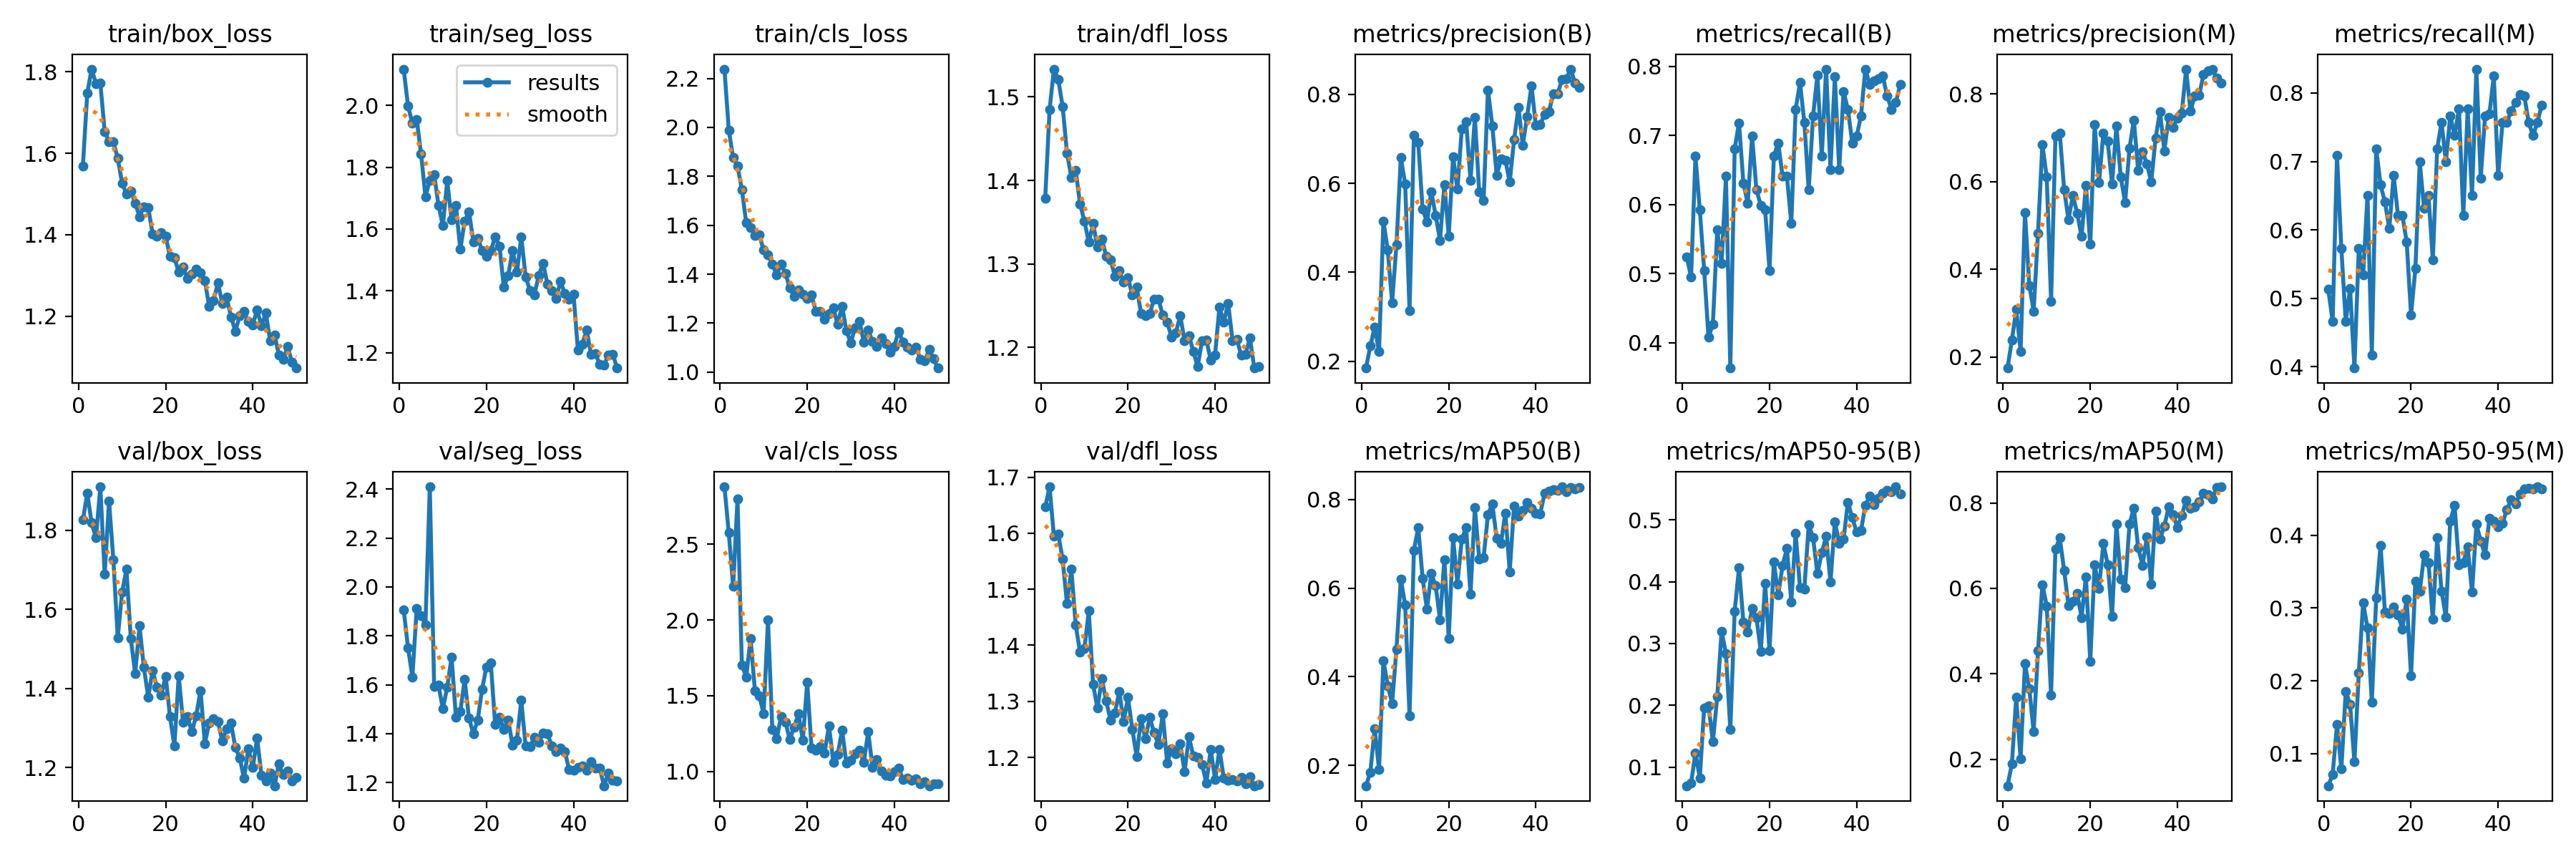

In [ ]:
Image("/content/drive/MyDrive/yolov8_segmentation (1)/yolov8_segmentation/results/50_epochs-4/results.png")

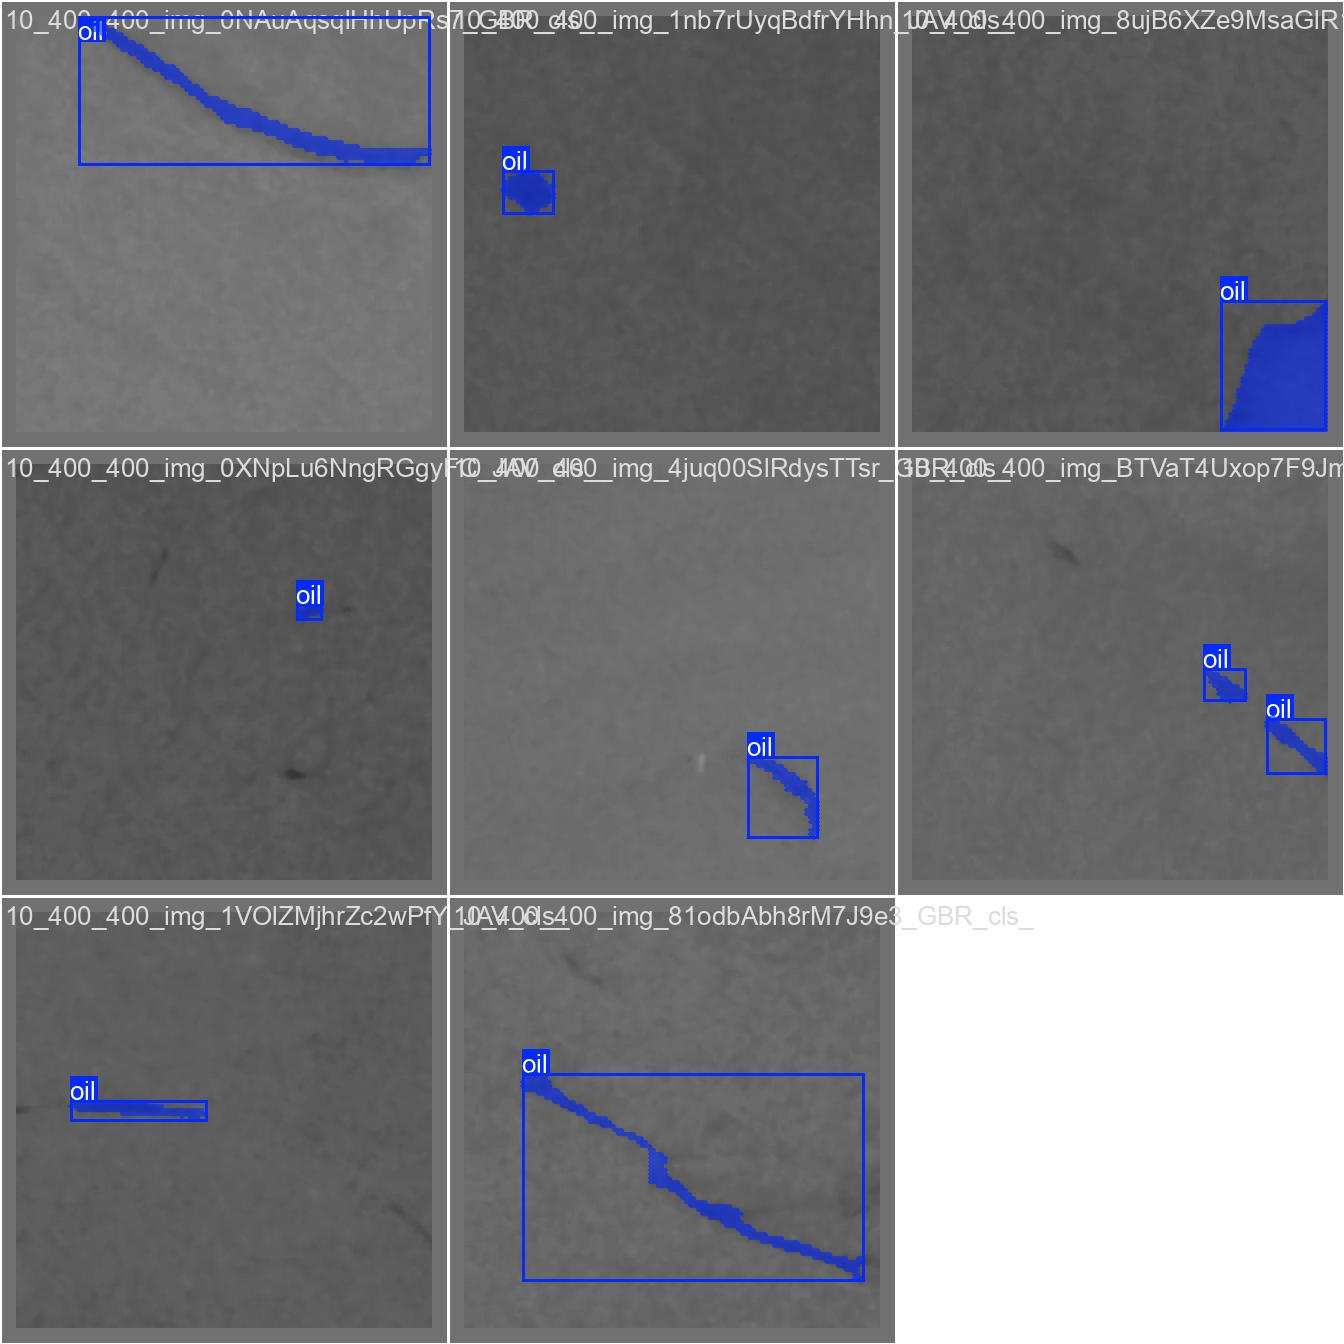

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8_segmentation (1)/yolov8_segmentation/results/50_epochs-4/val_batch0_labels.jpg', width=800)

**Run inference**

Now that our model is trained, we can use it for inference.

In [ ]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/drive/MyDrive/yolov8_segmentation/yolov8_segmentation/results/50_epochs-4/weights

best.pt  last.pt


You can load the best model or the latest. I am picking the latest.

In [ ]:
my_new_model = YOLO('/content/drive/MyDrive/yolov8_segmentation/yolov8_segmentation/results/50_epochs-4/weights/best.pt')

Load an image and perform inference (segmentation).

In [ ]:
new_image = '/content/drive/MyDrive/yolov8_segmentationn/test/images/10_400_400_img_m9QkzRGW4fH4hl1g_JAV_cls_1_jpg.rf.0ffa0677cc5bb4a53532965d6f3cabc4.jpg'
new_results = my_new_model.predict(new_image, conf=0.5)  #Adjust conf threshold



image 1/1 /content/drive/MyDrive/yolov8_segmentationn/test/images/10_400_400_img_m9QkzRGW4fH4hl1g_JAV_cls_1_jpg.rf.0ffa0677cc5bb4a53532965d6f3cabc4.jpg: 416x416 1 oil, 14.7ms
Speed: 2.9ms preprocess, 14.7ms inference, 6.1ms postprocess per image at shape (1, 3, 416, 416)


The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

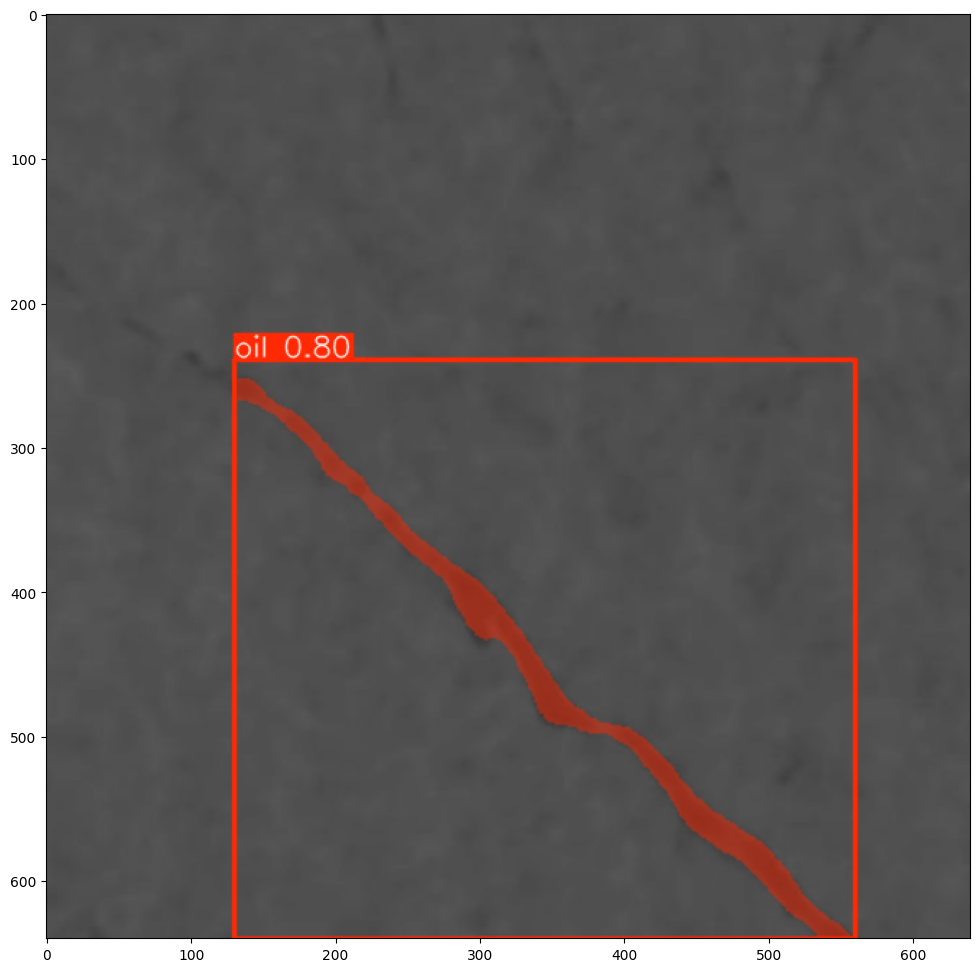

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

**Extracting bounding boxes and segmented masks from the result**

In [ ]:
new_result = new_results[0]

In [ ]:
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'oil'}
obb: None
orig_img: array([[[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[82, 82, 82],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[81, 81, 81],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[81, 81, 81],
        [81, 81, 81],


**Extracting bounding polygons** <p>
Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels)

In [ ]:
new_result.masks.xyn

[array([[     0.1875,     0.38942],
        [     0.1875,     0.39904],
        [    0.19471,     0.39904],
        [    0.19712,     0.40144],
        [    0.19952,     0.40144],
        [    0.20192,     0.40385],
        [    0.20192,     0.40625],
        [    0.20433,     0.40865],
        [    0.20673,     0.40865],
        [    0.20913,     0.41106],
        [    0.21154,     0.41106],
        [    0.21394,     0.41346],
        [    0.21635,     0.41346],
        [    0.22115,     0.41827],
        [    0.22356,     0.41827],
        [    0.22596,     0.42067],
        [    0.23077,     0.42067],
        [    0.23558,     0.42548],
        [    0.23798,     0.42548],
        [    0.24038,     0.42788],
        [    0.24519,     0.42788],
        [       0.25,     0.43269],
        [       0.25,      0.4351],
        [     0.2524,      0.4375],
        [    0.25481,      0.4375],
        [    0.26202,     0.44471],
        [    0.26202,     0.44712],
        [    0.26442,     0.

**Extracting segmented masks**

In [ ]:
extracted_masks = new_result.masks.data

In [ ]:
extracted_masks.shape

torch.Size([2, 416, 416])

Push the mask to cpu (from GPU) and convert to numpy array for easy plotting.

In [ ]:
masks_array = extracted_masks.cpu().numpy()

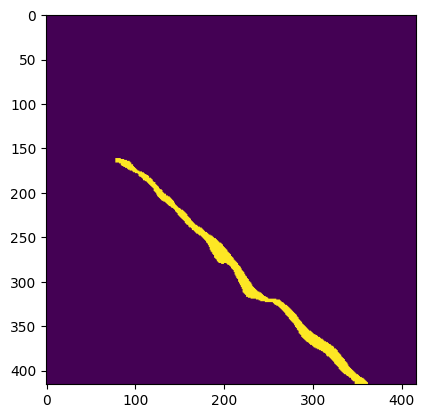

In [ ]:
plt.imshow(masks_array[0])